# **THE STATCAST REVOLUTION BEGINS....**

In [14]:
#importing the requisite libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#importing the datasets
judge=pd.read_csv('https://raw.githubusercontent.com/debadrita1517/Data-Analysis-in-Baseball/main/judge.csv')
stanton=pd.read_csv('https://raw.githubusercontent.com/debadrita1517/Data-Analysis-in-Baseball/main/stanton.csv')

# **Aron Judge and Giancarlo Stanton's Profilic Sluggers -**

In [4]:
#displaying all columns
pd.set_option('display.max_columns',None)
#displaying last 5 rows of the Aron Judge dataframe
print(judge.tail(5))

     pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
3431         CH  2016-08-13           85.6        -1.9659         5.9113   
3432         CH  2016-08-13           87.6        -1.9318         5.9349   
3433         CH  2016-08-13           87.2        -2.0285         5.8656   
3434         CU  2016-08-13           79.7        -1.7108         6.1926   
3435         FF  2016-08-13           93.2        -1.8476         6.0063   

      player_name  batter  pitcher    events          description  spin_dir  \
3431  Aaron Judge  592450   542882       NaN                 ball       NaN   
3432  Aaron Judge  592450   542882  home_run  hit_into_play_score       NaN   
3433  Aaron Judge  592450   542882       NaN                 ball       NaN   
3434  Aaron Judge  592450   542882       NaN                 foul       NaN   
3435  Aaron Judge  592450   542882       NaN        called_strike       NaN   

      spin_rate_deprecated  break_angle_deprecated  break_length_dep

In [6]:
#displaying all of Aron Judge's batted ball events in 2017
judge_events_2017=judge.loc[judge['game_year']==2017].events
print("\nAron Judge's batted ball event totals, 2017 :")
print(judge_events_2017.value_counts())
#displaying all of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017=stanton.loc[stanton['game_year']==2017].events
print("\Giancarlo Stanton's batted ball event totals, 2017 :")
print(stanton_events_2017.value_counts())


Aron Judge's batted ball event totals, 2017 :
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
field_error                    4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64
\Giancarlo Stanton's batted ball event totals, 2017 :
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
hit_by_pitch                   7
force_out                      7
field_error                    5
sac_fly       

# **Analysing Home Runs with Statcast Data -**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

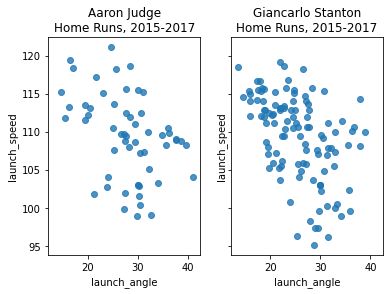

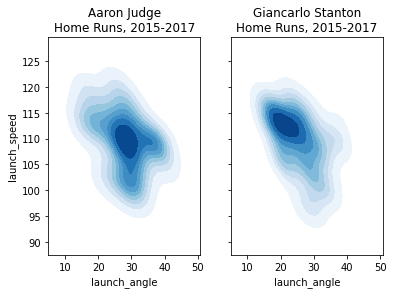

In [7]:
# Filtering to include home runs only
judge_hr = judge[judge['events']=='home_run']
stanton_hr = stanton[stanton['events']=='home_run']
# Creating a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')
# Creating a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr.launch_angle, judge_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr.launch_angle, stanton_hr.launch_speed, cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# **Home Runs by Pitch Velocity -**

Text(0.5, 1.0, 'Home Runs, 2015-2017')

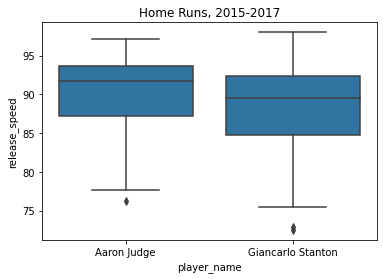

In [8]:
# Combining the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])
# Creating a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(x='player_name',y='release_speed', color='tab:blue', data=judge_stanton_hr).set_title('Home Runs, 2015-2017')

# **Home Runs by Pitch Location-I :**

In [9]:
def assign_x_coord(row):
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

# **Home Runs by Pitch Location-II :**

In [10]:
def assign_y_coord(row):
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

# **Aaron Judge's Home Run Zone -**

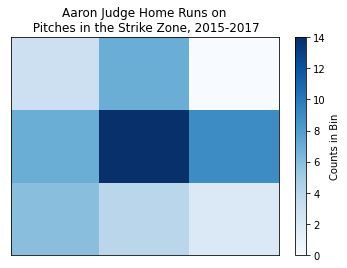

In [11]:
# Zones 11, 12, 13, and 14 have been ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]
# Assigning Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)
# Plotting Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# **Giancarlo Stanton's Home Run Zone -**

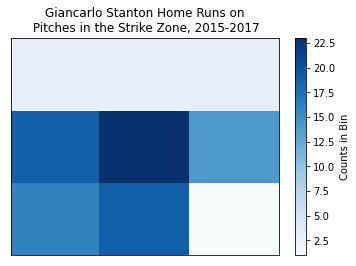

In [12]:
# Zones 11, 12, 13, and 14 have been ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]
# Assigning Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)
# Plotting Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

# **Should opposing pichers be scared ?**

In [13]:
# Should opposing pitchers be wary of Aaron Judge and Giancarlo Stanton
should_pitchers_be_scared = True